# 神经网络的实践

## TensorDataset 

TensorDataset在PyTorch中是一个非常有用的数据集类,它可以将tensors打包成数据集以供模型训练。

可以看到TensorDataset将输入的特征和标签打包成了数据集,可以用于后面的模型训练。

它的主要作用有:

- 将特征和标签组合成数据集

- 支持打包多个tensor,如图像、标签等

- 可以索引样例,方便读取

- 兼容 DataLoader,可以批量读取

TensorDataset使得tensor数据的组织和读取非常简洁高效。

## DataLoader

在PyTorch中,DataLoader是用于数据读取的重要类,其主要作用和用法示例如下:

1. 数据读取

DataLoader实现了对Dataset按batch读取,支持多进程读,自动转为GPU等功能:


2. 批处理

可以指定batch大小,将数据分成批进行读取:


3. 随机打乱

设置shuffle=True可以按epoch随机打乱数据:

4. 多进程加速

设置num_workers启动多进程读取数据:

5. 样本采样

可以通过Sampler自定义从数据集中采样样本:

总之,DataLoader提高了数据读取效率,是PyTorch中使用数据集的标准方式。

In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [5]:
# 初始化特征和标签张量
features = torch.randn(100, 5) 
labels = torch.randint(0, 10, (100,))

# 用TensorDataset打包特征和标签
dataset = TensorDataset(features, labels)

# 创建数据加载器
dataloader = DataLoader(dataset, batch_size=8) 

In [6]:
dataset[0]

(tensor([ 0.5523,  0.2738,  0.1225, -0.1789, -0.8072]), tensor(2))

In [4]:
for i in dataloader:
    print(i)
    break

[tensor([[-0.0114, -0.0916,  1.3767, -1.8570,  0.6364],
        [ 0.1598, -0.3302,  0.4382,  1.2717,  1.1800],
        [-0.5495,  0.5485,  0.0685, -1.4578,  1.5613],
        [ 0.6499,  0.0888,  0.5256, -1.2434, -0.4251],
        [-1.4292, -0.5635,  0.4385,  0.4239,  0.0719],
        [ 0.3692,  0.3452,  0.5108,  0.5149, -0.3104],
        [ 0.2049, -1.6116,  0.0566,  0.4828,  0.2168],
        [ 0.1305, -1.4151, -0.8409, -0.5174,  1.1110]]), tensor([0, 8, 3, 3, 6, 1, 8, 8])]


In [17]:
torch.randint(0, 10, (100,))

tensor([9, 2, 7, 0, 8, 6, 8, 5, 9, 5, 9, 1, 5, 1, 8, 5, 0, 0, 2, 6, 8, 9, 2, 9,
        6, 9, 6, 9, 9, 5, 5, 6, 3, 6, 8, 8, 3, 7, 2, 4, 0, 6, 8, 4, 7, 7, 4, 6,
        1, 3, 4, 5, 4, 6, 1, 9, 2, 2, 5, 3, 3, 1, 4, 7, 7, 2, 2, 0, 4, 3, 2, 6,
        5, 7, 6, 5, 8, 0, 6, 6, 0, 6, 4, 0, 1, 0, 7, 6, 5, 9, 2, 9, 5, 3, 2, 2,
        5, 6, 2, 0])

In [8]:
y = torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)

## 多分类，二分类与回归的问题切换

nn.MSELoss()

nn.BCEWithLogitsLoss()

In [16]:
#定义神经网路的架构
class Model(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super(Model,self).__init__() #super(请查找这个类的父类，请使用找到的父类替换现在的类)
        self.linear1 = nn.Linear(in_features,50,bias=True) #输入层不用写，这里是隐藏层的第一层
        self.linear2 = nn.Linear(50,20,bias=True)
        self.output = nn.Linear(20,out_features,bias=True)

    def forward(self, x):
        z1 = self.linear1(x)
        z1_relu = torch.relu(z1)
        z2 = self.linear2(z1_relu)
        z2_relu = torch.relu(z2)
        z3 = self.output(z2_relu)
        #sigma3 = F.softmax(z3,dim=1)
        return z3
#实例化神经网络，调用优化算法需要的参数


In [17]:
#确定数据、确定优先需要设置的值
lr = 0.1
gamma = 0.9
epochs=5
bs=50

torch.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32)
Y= torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)

data = TensorDataset(X,Y)
batchdata = DataLoader(data, batch_size=bs, shuffle = True)

input_ = X.shape[1] #特征的数目
output_ = len(Y.unique()) #分类的数目

torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters() , lr=lr , momentum = gamma) #动量参数

In [12]:
#Y.view(X.shape[0]).long()

In [18]:
for i in range(epochs):
    for batch_idx, (x,y) in enumerate(batchdata):
        #print(x,y)
        y = y.view(x.shape[0]).long()
        z1 = net.forward(x)
        loss = criterion(z1,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        #if batch_idx % 10 == 0:
        print("epoch:{} , loss:{}".format(i,loss))

epoch:0 , loss:1.0957516431808472
epoch:0 , loss:1.1143020391464233
epoch:0 , loss:1.1196856498718262
epoch:0 , loss:1.094942569732666
epoch:0 , loss:1.0956664085388184
epoch:0 , loss:1.0987811088562012
epoch:0 , loss:1.0922518968582153
epoch:0 , loss:1.101608395576477
epoch:0 , loss:1.0952848196029663
epoch:0 , loss:1.1202633380889893
epoch:1 , loss:1.0993648767471313
epoch:1 , loss:1.0835442543029785
epoch:1 , loss:1.1072036027908325
epoch:1 , loss:1.0957679748535156
epoch:1 , loss:1.0953600406646729
epoch:1 , loss:1.0984840393066406
epoch:1 , loss:1.1009411811828613
epoch:1 , loss:1.0960891246795654
epoch:1 , loss:1.1040639877319336
epoch:1 , loss:1.0937711000442505
epoch:2 , loss:1.1071516275405884
epoch:2 , loss:1.0898280143737793
epoch:2 , loss:1.0876266956329346
epoch:2 , loss:1.1013351678848267
epoch:2 , loss:1.087397813796997
epoch:2 , loss:1.0829508304595947
epoch:2 , loss:1.1102570295333862
epoch:2 , loss:1.1041171550750732
epoch:2 , loss:1.107223391532898
epoch:2 , loss:1.0

# 基于真实数据的神经网络模型构建

torch.max(sigma,1)[1]

torch.sum(r1 == y)

x.view(-1, 28*28)

In [26]:
mnist = torchvision.datasets.FashionMNIST(root='H:\data\FashionMNIST', train=True, download=True, transform=transforms.ToTensor())

In [69]:
mnist

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: H:\data\FashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

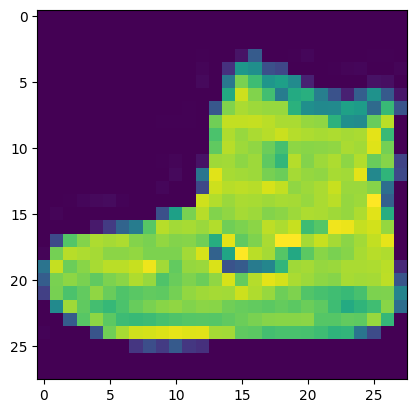

In [70]:
plt.imshow(mnist[0][0].view((28, 28)).numpy())

In [52]:
mnist.targets
mnist.data.shape
#mnist[0][0].view(-1, 28*28)

torch.Size([60000, 28, 28])

In [49]:
#定义神经网路的架构
class Model_mnist(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super().__init__() 
        self.linear1 = nn.Linear(in_features,128)
        self.output = nn.Linear(128,out_features)

    def forward(self, x):
        x = x.view(-1, 28*28)
        sigma1 = torch.relu(self.linear1(x))
        z2 = self.output(sigma1)
        return z2

In [36]:
#mnist[0][0]

In [41]:
mnist.data[0].shape

torch.Size([28, 28])

In [42]:
28*28

784

In [78]:
#mnist.data[0]